<b><font size="6">|027|Polynomial Tree Regression|House Price Prediction </font></b>

* **Author**: Dino Giovannoni
* **Date:**: 11-April-2025


**The Problem:** 

The problem to be solved involves  a set of features that describe house characteristics in a city in the USA. The goal is to develop a machine learning model to predict the house price based on the features. The data was drawn from a statistical survey conducted in 1970.

The dataset contains the following variables:

    CRIM    : Per capita crime rate by town
    ZN      : Proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS   : Proportion of non-retail business acres per town
    NOX     : Nitric oxides concentration (parts per 10 million)
    RM      : Average number of rooms per dwelling
    AGE     : Proportion of owner-occupied units built prior to 1940
    DIS     : Weighted distances to five employment centres
    TAX     : Full-value property-tax rate per USD 10,000
    PTRATIO : Pupil-teacher ratio by town
    LSTAT   : % lower status of the population
    PRICE   : Median value of owner-occupied homes in US Dollars (USD)

**The Dataset**
https://www.kaggle.com/datasets/altavish/boston-housing-dataset

In [1]:
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_excel('HousingData.xlsx')

# Exploratory Data Analysis & Data Processing

## Data Inspection

In [3]:
df.head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24000
1,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,311,15.2,12.43,22900
2,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,311,15.2,19.15,27100
3,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,311,15.2,29.93,16500
4,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,311,15.2,17.10,18900
5,0.22489,12.5,7.87,0.524,6.377,94.3,6.3467,311,15.2,20.45,15000
6,0.11747,12.5,7.87,0.524,6.009,82.9,6.2267,311,15.2,13.27,18900
7,0.09378,12.5,7.87,0.524,5.889,39.0,5.4509,311,15.2,15.71,21700
8,0.62976,0.0,8.14,0.538,5.949,61.8,4.7075,307,21.0,8.26,20400
9,0.63796,0.0,8.14,0.538,6.096,84.5,4.4619,307,21.0,10.26,18200


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     441 non-null    float64
 1   ZN       441 non-null    float64
 2   INDUS    441 non-null    float64
 3   NOX      441 non-null    float64
 4   RM       441 non-null    float64
 5   AGE      441 non-null    float64
 6   DIS      441 non-null    float64
 7   TAX      441 non-null    int64  
 8   PTRATIO  441 non-null    float64
 9   LSTAT    441 non-null    float64
 10  PRICE    441 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 38.0 KB


None

In [5]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
CRIM,441.0,4.137003,9.098257,0.00632,0.12269,0.40202,4.75237,88.9762
ZN,441.0,13.038549,24.543901,0.00000,0.00000,0.00000,20.00000,100.0000
INDUS,441.0,11.678481,6.802334,0.46000,5.86000,9.90000,18.10000,27.7400
NOX,441.0,0.564192,0.120025,0.38500,0.44800,0.54400,0.64700,0.8710
RM,441.0,6.272340,0.725461,3.56100,5.87500,6.20800,6.62900,8.7800
AGE,441.0,70.378231,28.560350,2.90000,45.60000,82.50000,95.00000,100.0000
DIS,441.0,3.737616,2.179838,1.12960,1.99290,2.89440,5.11670,12.1265
TAX,441.0,428.034014,169.897994,187.00000,293.00000,384.00000,666.00000,711.0000
PTRATIO,441.0,18.469161,2.258550,12.60000,17.30000,19.10000,20.20000,22.0000
LSTAT,441.0,13.225601,7.385932,1.73000,7.19000,12.33000,17.60000,37.9700


Suppose we want to predict the house price for the following set of parameters:

In [6]:
X_required = {"CRIM"     : 4.1,
           "ZN"       : 13.5,
           "INDUS"    : 11.8,
           "NOX"      : 0.55, 
           "RM"       : 5,
           "AGE"      : 68, 
           "DIS"      : 3.5, 
           "TAX"      : 385, 
           "PTRATIO"  : 15.7, 
           "LSTAT"    : 13.4
          }

## Duplicates

Let's check if there are duplicate records in the dataset. These may skew the results.

In [7]:
duplicates = df[df.duplicated()]
print(duplicates)
# df.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, LSTAT, PRICE]
Index: []


## Feature Selection

Let's identify the features and output variable of the dataframe:

In [8]:
output_var = "PRICE"
features = df.columns.drop(output_var).tolist()
print(features)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']


## Box Plots

Generate a boxplot of all the features:

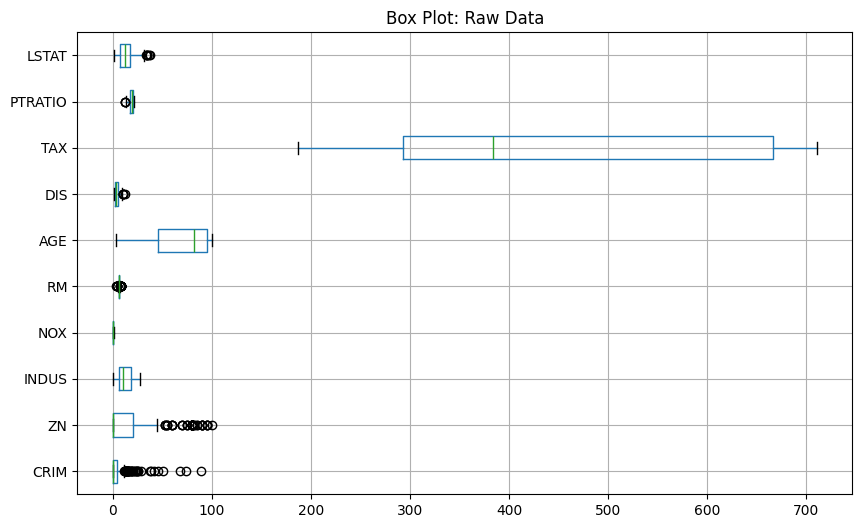

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df[features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Raw Features')

## Descriptive Statistics

The ranges of two of the variables look low, while one looks high. Lets look at the statistics to check how small/high:

In [10]:
df[features].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,441.0,4.137003,9.098257,0.00632,0.12269,0.40202,4.75237,88.9762
ZN,441.0,13.038549,24.543901,0.00000,0.00000,0.00000,20.00000,100.0000
INDUS,441.0,11.678481,6.802334,0.46000,5.86000,9.90000,18.10000,27.7400
NOX,441.0,0.564192,0.120025,0.38500,0.44800,0.54400,0.64700,0.8710
RM,441.0,6.272340,0.725461,3.56100,5.87500,6.20800,6.62900,8.7800
AGE,441.0,70.378231,28.560350,2.90000,45.60000,82.50000,95.00000,100.0000
DIS,441.0,3.737616,2.179838,1.12960,1.99290,2.89440,5.11670,12.1265
TAX,441.0,428.034014,169.897994,187.00000,293.00000,384.00000,666.00000,711.0000
PTRATIO,441.0,18.469161,2.258550,12.60000,17.30000,19.10000,20.20000,22.0000
LSTAT,441.0,13.225601,7.385932,1.73000,7.19000,12.33000,17.60000,37.9700


## Data Scaling

The order-of magnitude of most of the variables is in the 10's, except for NOX and RM that looks low, while TAX looks too high. 

Lets perform a simple scaling of them. There are more sophisticated methods, but it's always best to start simple!

In [11]:
df["NOX"] = df["NOX"]*100
df["RM"] = df["RM"]*10
df["TAX"] = df["TAX"]/10

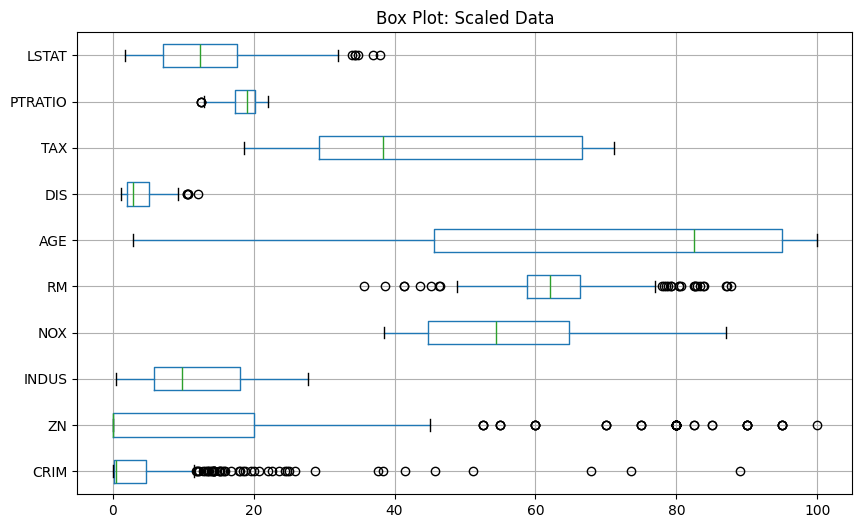

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df[features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Scaled Data')

In [13]:
df[features].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,441.0,4.137003,9.098257,0.00632,0.12269,0.40202,4.75237,88.9762
ZN,441.0,13.038549,24.543901,0.00000,0.00000,0.00000,20.00000,100.0000
INDUS,441.0,11.678481,6.802334,0.46000,5.86000,9.90000,18.10000,27.7400
NOX,441.0,56.419206,12.002482,38.50000,44.80000,54.40000,64.70000,87.1000
RM,441.0,62.723401,7.254608,35.61000,58.75000,62.08000,66.29000,87.8000
AGE,441.0,70.378231,28.560350,2.90000,45.60000,82.50000,95.00000,100.0000
DIS,441.0,3.737616,2.179838,1.12960,1.99290,2.89440,5.11670,12.1265
TAX,441.0,42.803401,16.989799,18.70000,29.30000,38.40000,66.60000,71.1000
PTRATIO,441.0,18.469161,2.258550,12.60000,17.30000,19.10000,20.20000,22.0000
LSTAT,441.0,13.225601,7.385932,1.73000,7.19000,12.33000,17.60000,37.9700


## Plot Histograms

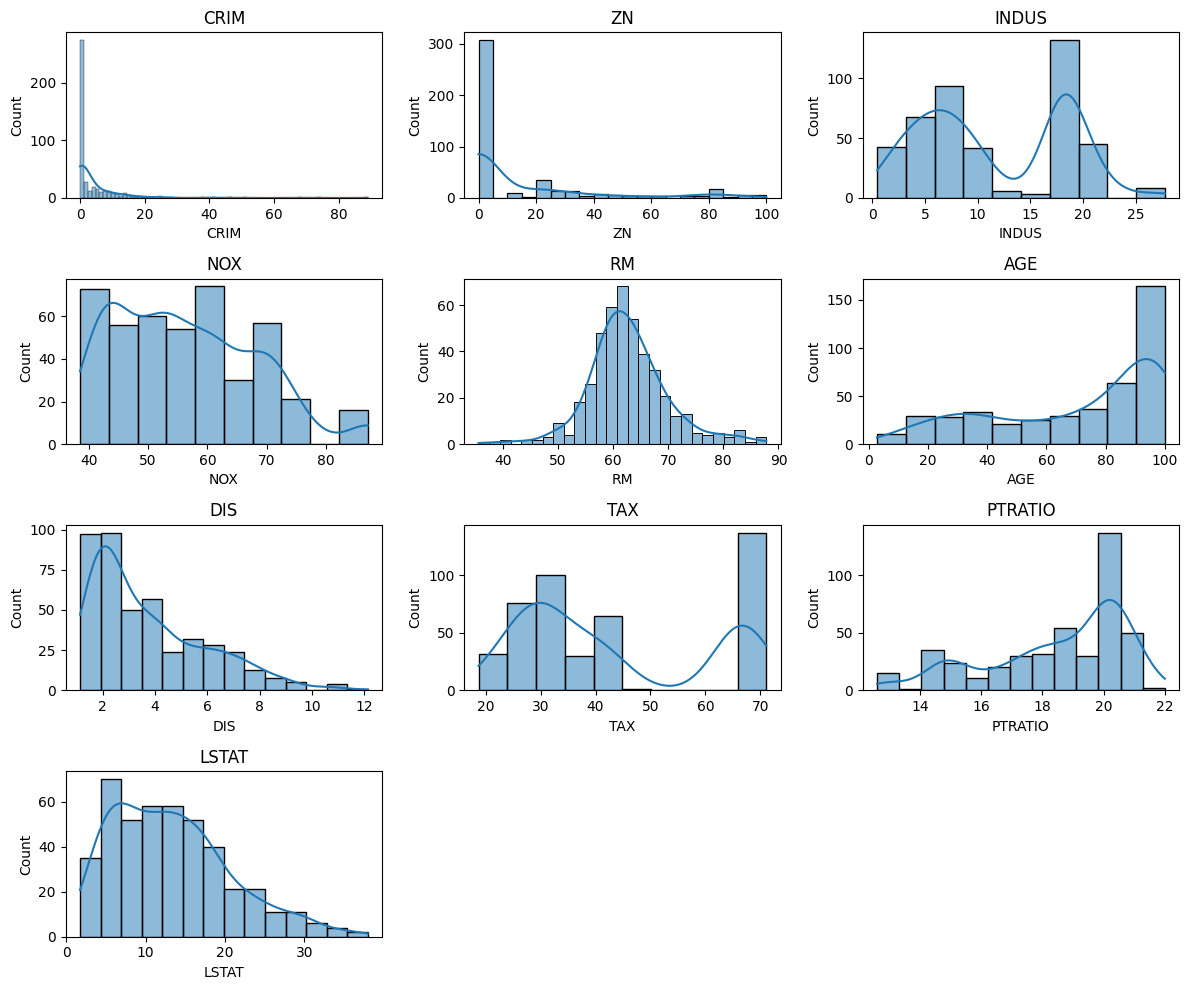

In [14]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

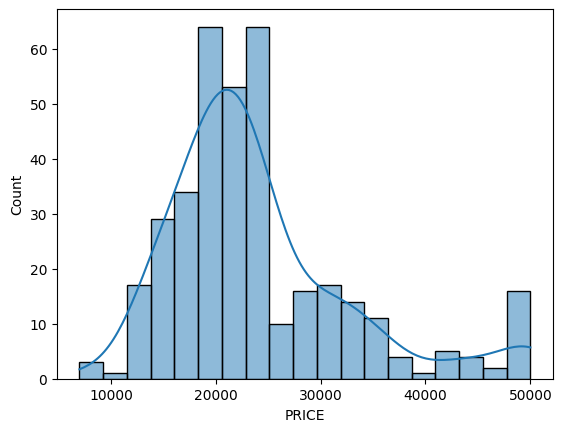

In [52]:
_ = sns.histplot(df[output_var], kde=True)

## Outliers

From the boxplot and histograms, we see that there seem to be a LOT of outliers in the CRIM field.

<Axes: >

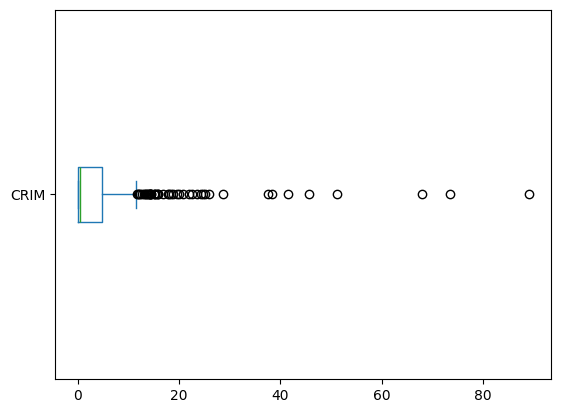

In [16]:
df["CRIM"].plot.box(vert = 0)

There are several ways of removing outliers, but lets do a simple approach, and drop all data where CRIM > 20. 

In [17]:
df = df[df["CRIM"] <= 20]

<Axes: >

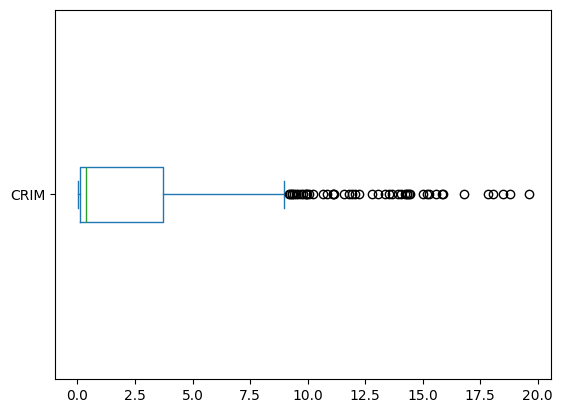

In [18]:
df["CRIM"].plot.box(vert = 0)

This still seems to contain many outliers. Let's remove all that are greater than say, 8. 

But, now the scaling of CRIM will not be the right order of magnitude!! Let's remove the outliers and then rescale the CRIM variable.

In [19]:
df = df[df["CRIM"] <= 8]

df["CRIM"] = df["CRIM"]*10

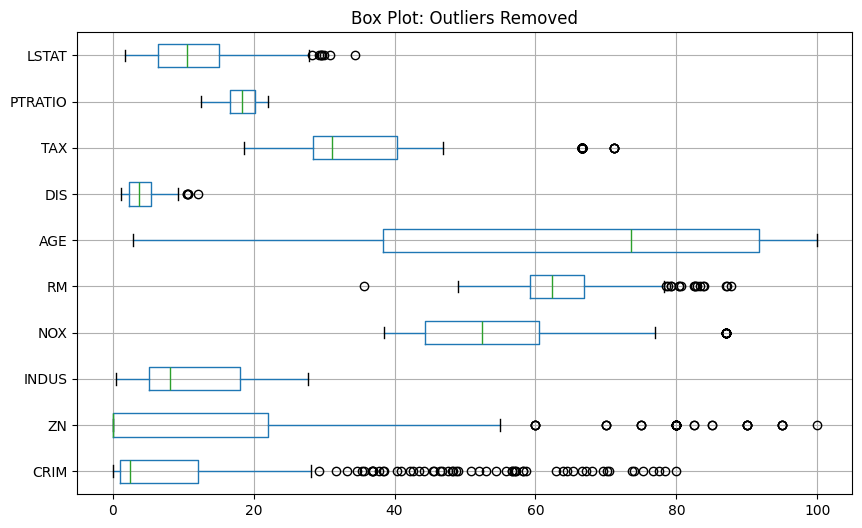

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df[features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Outliers Removed')

In [21]:
df[features].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,365.0,12.018999,19.448049,0.0632,1.0290,2.4103,12.0742,79.9248
ZN,365.0,15.753425,26.178110,0.0000,0.0000,0.0000,22.0000,100.0000
INDUS,365.0,10.341397,6.747628,0.4600,5.1300,8.1400,18.1000,27.7400
NOX,365.0,54.089507,11.725297,38.5000,44.2900,52.4000,60.5000,87.1000
RM,365.0,63.498137,6.983587,35.6100,59.2000,62.2900,66.8300,87.8000
AGE,365.0,65.502466,28.822411,2.9000,38.4000,73.5000,91.8000,100.0000
DIS,365.0,4.146259,2.177475,1.2024,2.3817,3.6659,5.4917,12.1265
TAX,365.0,37.848493,14.355107,18.7000,28.4000,31.1000,40.3000,71.1000
PTRATIO,365.0,18.108767,2.326019,12.6000,16.6000,18.4000,20.2000,22.0000
LSTAT,365.0,11.485671,6.300242,1.7300,6.4800,10.5800,15.1000,34.4100


We may want to scale the variables PTRATIO and DIS.

In [22]:
df["PTRATIO"] = df["PTRATIO"]*3
df["DIS"] = df["DIS"]*6

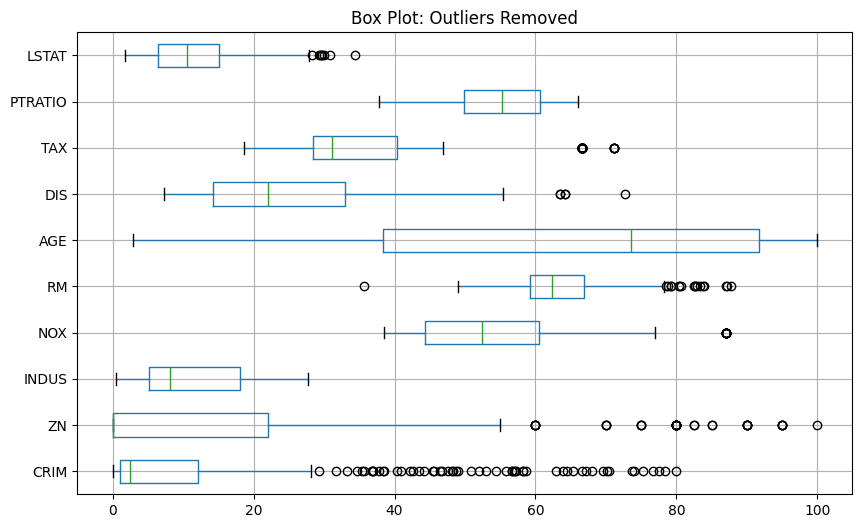

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df[features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Outliers Removed')

**IMPORTANT NOTE:** We must keep track of all the scaling when we need to make predictions!! 

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,365.0,12.018999,19.448049,0.0632,1.0290,2.4103,12.0742,79.9248
ZN,365.0,15.753425,26.178110,0.0000,0.0000,0.0000,22.0000,100.0000
INDUS,365.0,10.341397,6.747628,0.4600,5.1300,8.1400,18.1000,27.7400
NOX,365.0,54.089507,11.725297,38.5000,44.2900,52.4000,60.5000,87.1000
RM,365.0,63.498137,6.983587,35.6100,59.2000,62.2900,66.8300,87.8000
AGE,365.0,65.502466,28.822411,2.9000,38.4000,73.5000,91.8000,100.0000
DIS,365.0,24.877553,13.064848,7.2144,14.2902,21.9954,32.9502,72.7590
TAX,365.0,37.848493,14.355107,18.7000,28.4000,31.1000,40.3000,71.1000
PTRATIO,365.0,54.326301,6.978056,37.8000,49.8000,55.2000,60.6000,66.0000
LSTAT,365.0,11.485671,6.300242,1.7300,6.4800,10.5800,15.1000,34.4100


## Correlation analysis

In [25]:
df.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,PRICE
CRIM,1.000000,-0.347632,0.592023,0.625898,-0.154223,0.421357,-0.459057,0.817061,0.280612,0.331405,-0.242988
ZN,-0.347632,1.000000,-0.599716,-0.560023,0.331659,-0.623184,0.696826,-0.331415,-0.360638,-0.466785,0.365059
INDUS,0.592023,-0.599716,1.000000,0.749691,-0.375158,0.627086,-0.698578,0.694670,0.302828,0.533227,-0.408311
NOX,0.625898,-0.560023,0.749691,1.000000,-0.278627,0.696488,-0.756730,0.584706,0.044646,0.495094,-0.313893
RM,-0.154223,0.331659,-0.375158,-0.278627,1.000000,-0.217665,0.152204,-0.222497,-0.346560,-0.633740,0.778277
AGE,0.421357,-0.623184,0.627086,0.696488,-0.217665,1.000000,-0.721033,0.414117,0.171449,0.567887,-0.319770
DIS,-0.459057,0.696826,-0.698578,-0.756730,0.152204,-0.721033,1.000000,-0.449877,-0.120652,-0.409829,0.142736
TAX,0.817061,-0.331415,0.694670,0.584706,-0.222497,0.414117,-0.449877,1.000000,0.394341,0.333861,-0.316702
PTRATIO,0.280612,-0.360638,0.302828,0.044646,-0.346560,0.171449,-0.120652,0.394341,1.000000,0.290102,-0.475098
LSTAT,0.331405,-0.466785,0.533227,0.495094,-0.633740,0.567887,-0.409829,0.333861,0.290102,1.000000,-0.716580


<Axes: >

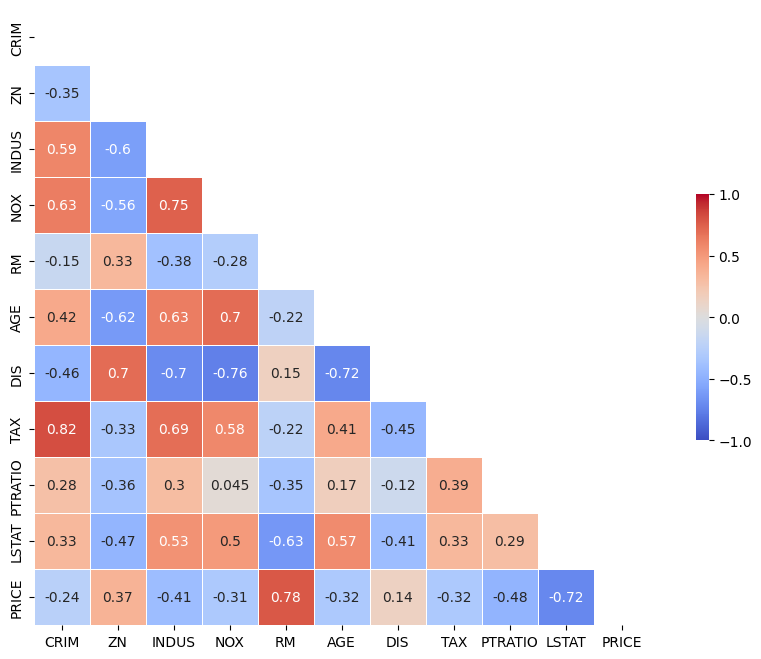

In [26]:
# Create a mask
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(),
            square = True,
            linewidths = .5,
            cmap = 'coolwarm',
            cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin = -1, 
            vmax = 1,
            annot = True,
            annot_kws = {'size': 10}, 
            mask = mask
           )

## Scatter plots with Linear Regression

Seaborn has an very cool plot that let's you see a scatter plot of ALL the variables, with a linear regression line.
Note that this is slow!

In [27]:
# _ = sns.pairplot(df, corner=True, kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,365.0,12.018999,19.448049,0.0632,1.0290,2.4103,12.0742,79.9248
ZN,365.0,15.753425,26.178110,0.0000,0.0000,0.0000,22.0000,100.0000
INDUS,365.0,10.341397,6.747628,0.4600,5.1300,8.1400,18.1000,27.7400
NOX,365.0,54.089507,11.725297,38.5000,44.2900,52.4000,60.5000,87.1000
RM,365.0,63.498137,6.983587,35.6100,59.2000,62.2900,66.8300,87.8000
AGE,365.0,65.502466,28.822411,2.9000,38.4000,73.5000,91.8000,100.0000
DIS,365.0,24.877553,13.064848,7.2144,14.2902,21.9954,32.9502,72.7590
TAX,365.0,37.848493,14.355107,18.7000,28.4000,31.1000,40.3000,71.1000
PTRATIO,365.0,54.326301,6.978056,37.8000,49.8000,55.2000,60.6000,66.0000
LSTAT,365.0,11.485671,6.300242,1.7300,6.4800,10.5800,15.1000,34.4100


## Revisting the distributions

Let's check the histograms again:

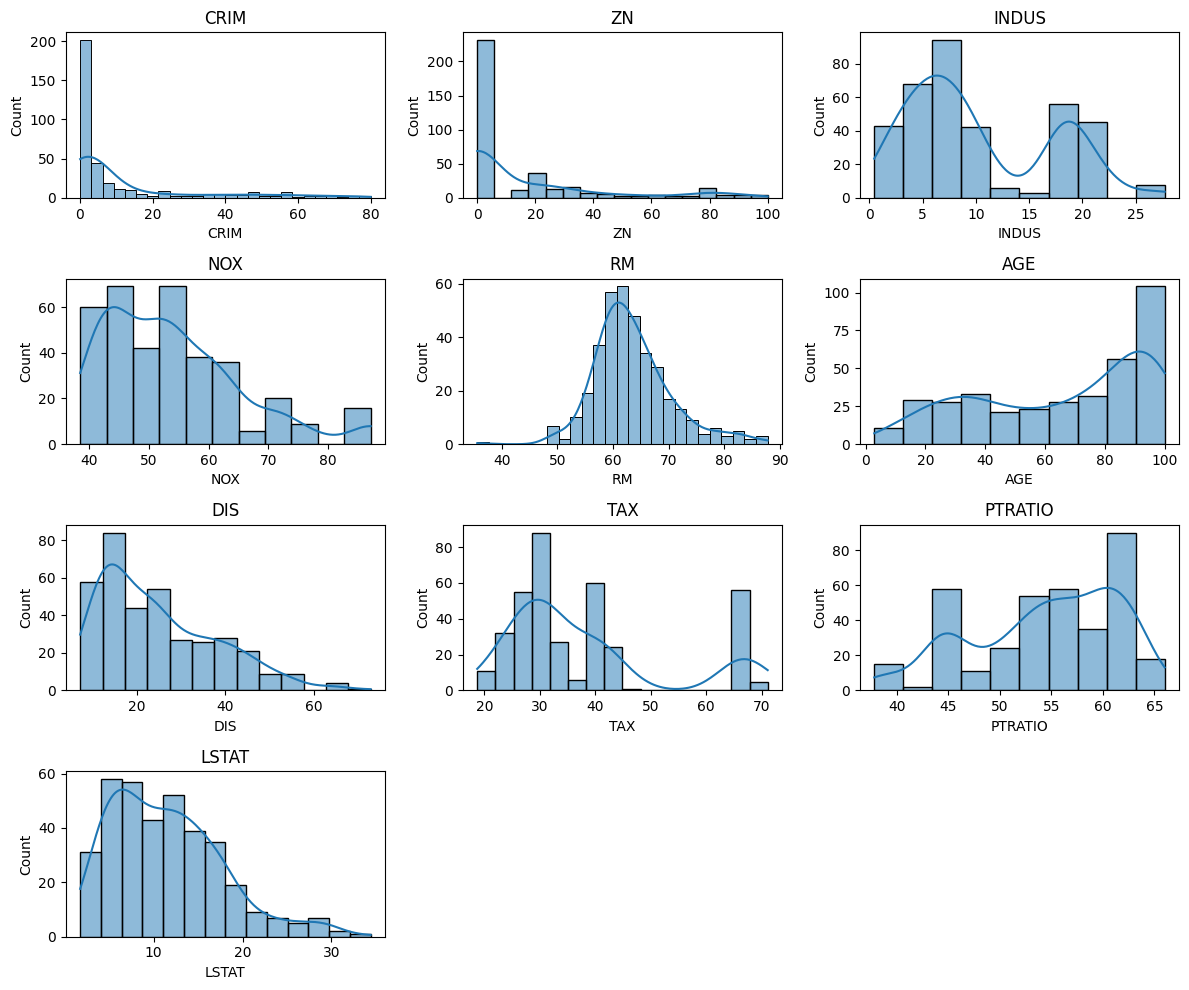

In [29]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

We see that CRIM and LSTAT are right-skewed. We need to *Normalize* them (i.e. make them more like a Normal (or Gaussian) distribution. One simple way of doing this is to take logs of the data. (Again, there are more sophisticated approaches!)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,365.0,12.018999,19.448049,0.0632,1.0290,2.4103,12.0742,79.9248
ZN,365.0,15.753425,26.178110,0.0000,0.0000,0.0000,22.0000,100.0000
INDUS,365.0,10.341397,6.747628,0.4600,5.1300,8.1400,18.1000,27.7400
NOX,365.0,54.089507,11.725297,38.5000,44.2900,52.4000,60.5000,87.1000
RM,365.0,63.498137,6.983587,35.6100,59.2000,62.2900,66.8300,87.8000
AGE,365.0,65.502466,28.822411,2.9000,38.4000,73.5000,91.8000,100.0000
DIS,365.0,24.877553,13.064848,7.2144,14.2902,21.9954,32.9502,72.7590
TAX,365.0,37.848493,14.355107,18.7000,28.4000,31.1000,40.3000,71.1000
PTRATIO,365.0,54.326301,6.978056,37.8000,49.8000,55.2000,60.6000,66.0000
LSTAT,365.0,11.485671,6.300242,1.7300,6.4800,10.5800,15.1000,34.4100


In [31]:
df.loc[:, "CRIM"] = np.log(df["CRIM"])
df.loc[:, "LSTAT"] = np.log(df["LSTAT"])

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,365.0,1.161377,1.721230,-2.761451,0.028587,0.879751,2.491071,4.381086
ZN,365.0,15.753425,26.178110,0.000000,0.000000,0.000000,22.000000,100.000000
INDUS,365.0,10.341397,6.747628,0.460000,5.130000,8.140000,18.100000,27.740000
NOX,365.0,54.089507,11.725297,38.500000,44.290000,52.400000,60.500000,87.100000
RM,365.0,63.498137,6.983587,35.610000,59.200000,62.290000,66.830000,87.800000
AGE,365.0,65.502466,28.822411,2.900000,38.400000,73.500000,91.800000,100.000000
DIS,365.0,24.877553,13.064848,7.214400,14.290200,21.995400,32.950200,72.759000
TAX,365.0,37.848493,14.355107,18.700000,28.400000,31.100000,40.300000,71.100000
PTRATIO,365.0,54.326301,6.978056,37.800000,49.800000,55.200000,60.600000,66.000000
LSTAT,365.0,2.281490,0.589305,0.548121,1.868721,2.358965,2.714695,3.538347


Let's look at the new distributions.

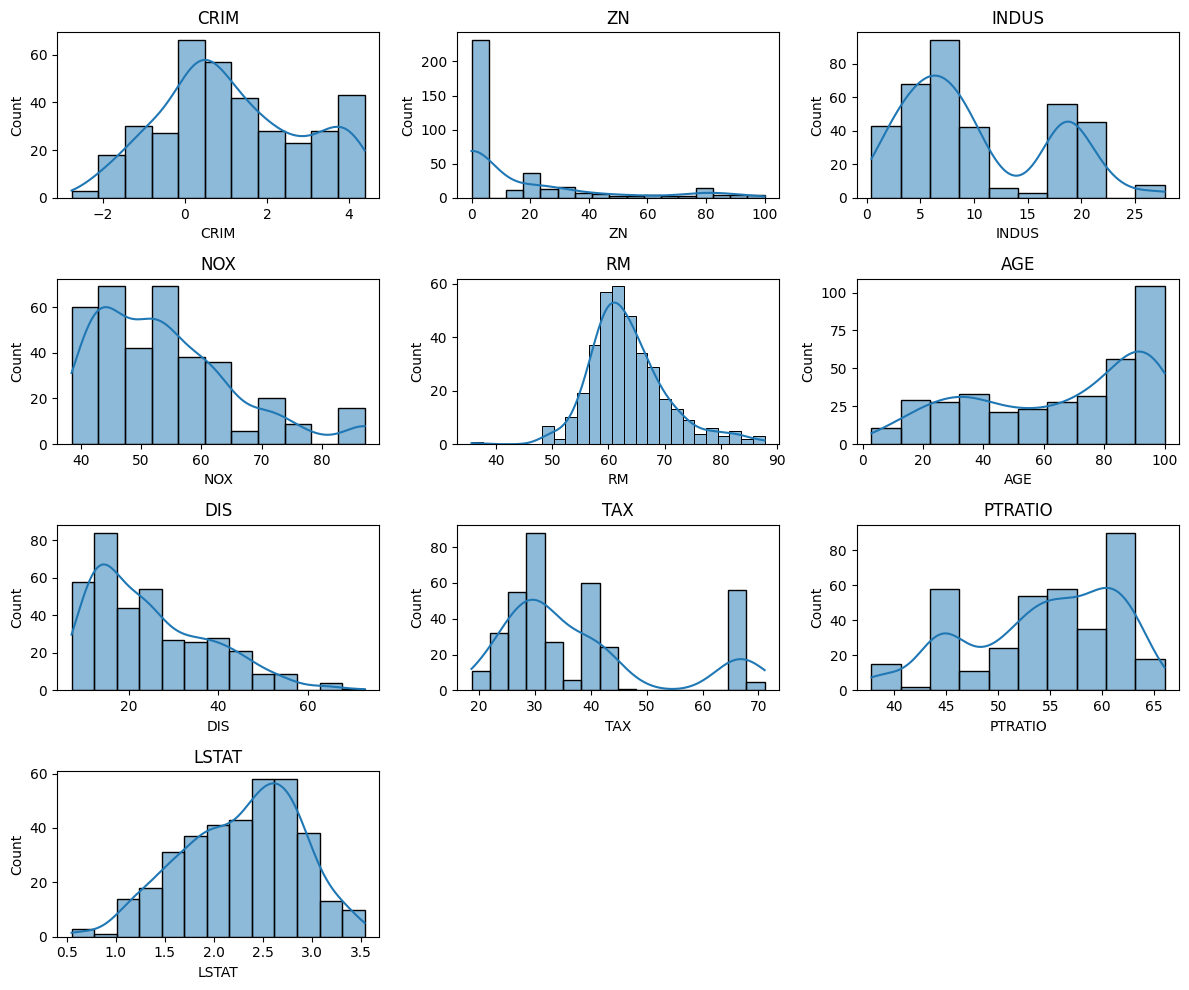

In [33]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

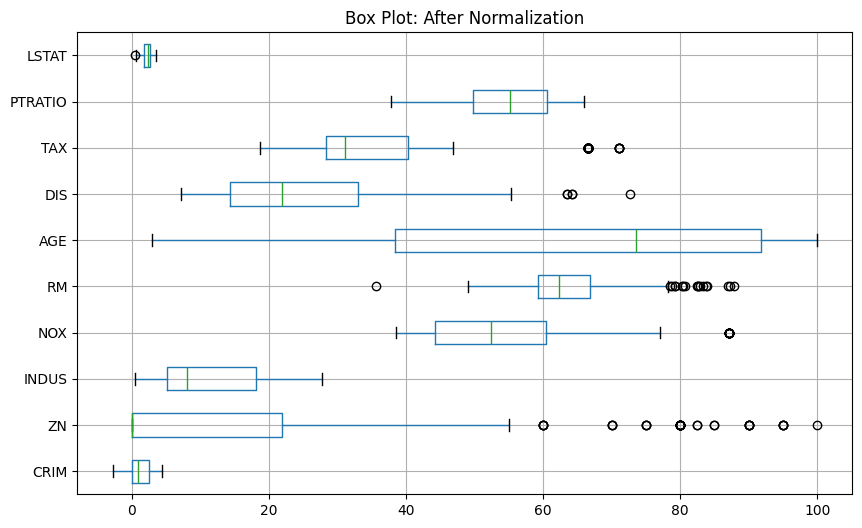

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df[features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: After Normalization')

The log transformation has now affected the scaling! Let's now rescale the LSTAT and CRIM variables.

In [35]:
df["CRIM"] = df["CRIM"]*10
df["LSTAT"] = df["LSTAT"]*20

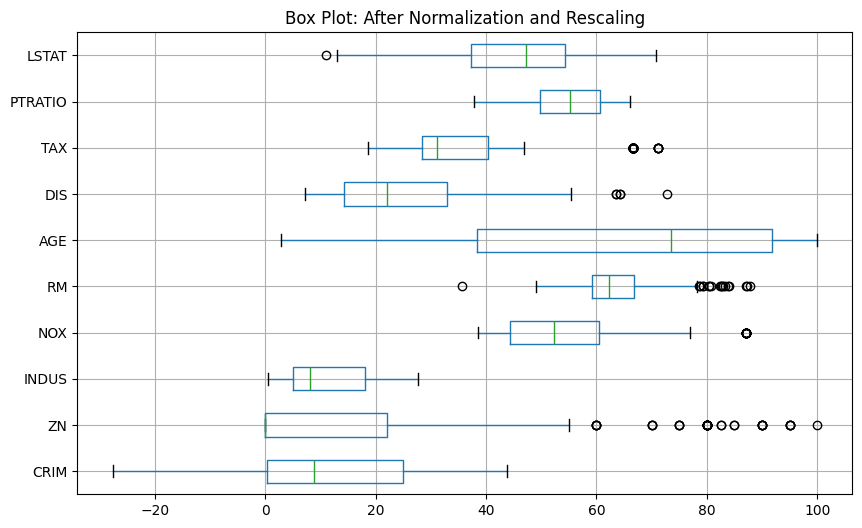

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df[features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: After Normalization and Rescaling')

# Model

We are now in the position to apply a machine learning model.
We define the features (X) and output variable y

In [37]:
X = df[features]
y = df[output_var]
display(X.head(), y.head())

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,-27.614510,18.0,2.31,53.8,65.75,65.2,24.5400,29.6,45.9,32.108598
1,-1.245433,12.5,7.87,52.4,60.12,66.6,33.3630,31.1,45.6,50.402258
2,3.684553,12.5,7.87,52.4,61.72,96.1,35.7030,31.1,45.6,59.046054
3,7.478247,12.5,7.87,52.4,56.31,100.0,36.4926,31.1,45.6,67.977226
4,5.308635,12.5,7.87,52.4,60.04,85.9,39.5526,31.1,45.6,56.781569


0    24000
1    22900
2    27100
3    16500
4    18900
Name: PRICE, dtype: int64

Let's use a multivariable polynomial regression.

In [38]:
degree = 2  
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(365, 65)

## Split data into training and test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=90)

In [40]:
X_train.shape

(292, 65)

## Training the models

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Evaluate

## Comparing Prediction vs Actual

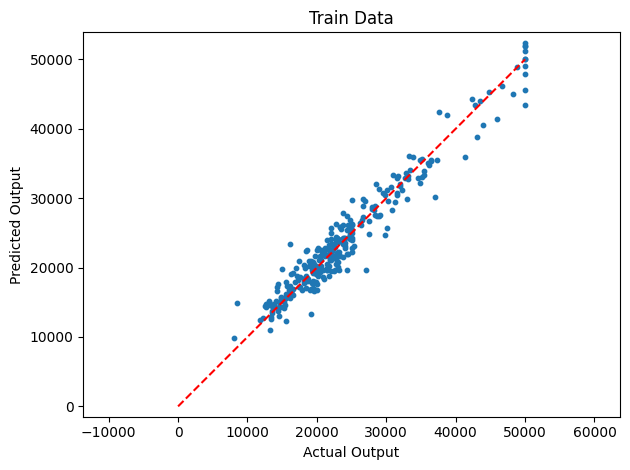

In [43]:
plt.scatter(y_train, y_train_pred, s=10)
plt.plot([0, y_train.max()], [0, y_train.max()], color = 'red', linestyle='dashed')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.axis('equal')
plt.title('Train Data')
plt.tight_layout()

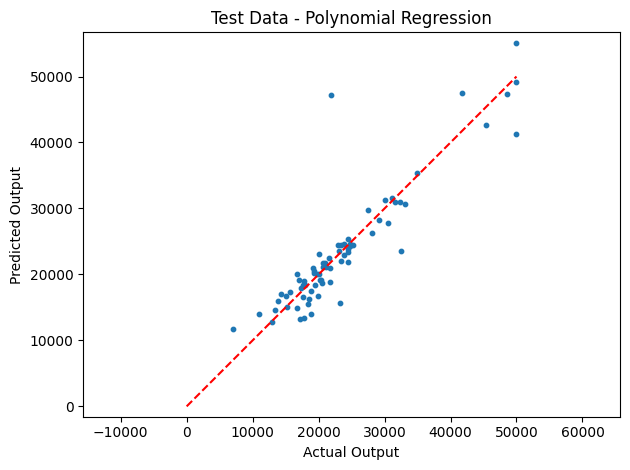

In [44]:
plt.scatter(y_test, y_test_pred, s=10)
plt.plot([0, y_test.max()], [0, y_test.max()], color = 'red', linestyle='dashed')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.axis('equal')
plt.title('Test Data - Polynomial Regression')
plt.tight_layout()

## Regression Metrics

In [45]:
train_mse =  np.round(mean_squared_error(y_train, y_train_pred),3)
train_rmse =  np.round(np.sqrt(train_mse),4)

print('TRAINING DATA:')
print(f'Polynomial Regression RMSE : {train_rmse}')

TRAINING DATA:
Polynomial Regression RMSE : 2068.4657


In [46]:
test_mse =  np.round(mean_squared_error(y_test, y_test_pred),3)
test_rmse =  np.round(np.sqrt(test_mse),4)

print('TESTING DATA:')
print(f'PolynomialRegression RMSE : {test_rmse}')

TESTING DATA:
PolynomialRegression RMSE : 3973.5744


## Prediction

This is where one needs to apply ALL the scaling, and transformations done on the data. 

**You can't use the data as is, because the model was trainined an the scaled and transformed data!!!!**

Let's go back and find all the transformations done, in the sequence that they were done!

  - df["NOX"] = df["NOX"]*100
  - df["RM"] = df["RM"]*10
  - df["TAX"] = df["TAX"]/10
  - df["CRIM"] = df["CRIM"]*10
  - df.loc[:, "CRIM"] = np.log(df["CRIM"])  
  - df["CRIM"] = df["CRIM"]*10  
  - df["PTRATIO"] = df["PTRATIO"]*3
  - df["DIS"] = df["DIS"]*6
  - df.loc[:, "LSTAT"] = np.log(df["LSTAT"])
  - df["LSTAT"] = df["LSTAT"]*20
  
We must also remember to convert it to a polynomial features!!  

In [47]:
X_point = X_required

X_point["NOX"] = X_point["NOX"]*100
X_point["RM"] = X_point["RM"]*10
X_point["TAX"] = X_point["TAX"]/10
X_point["CRIM"] = X_point["CRIM"]*10
X_point["CRIM"] = np.log(X_point["CRIM"])
X_point["CRIM"] = X_point["CRIM"]*10
X_point["PTRATIO"] = X_point["PTRATIO"]*3
X_point["DIS"] = X_point["DIS"]*6
X_point["LSTAT"] = np.log(X_point["LSTAT"])
X_point["LSTAT"] = X_point["LSTAT"]*20

display(X_point)

{'CRIM': 37.13572066704308,
 'ZN': 13.5,
 'INDUS': 11.8,
 'NOX': 55.00000000000001,
 'RM': 50,
 'AGE': 68,
 'DIS': 21.0,
 'TAX': 38.5,
 'PTRATIO': 47.099999999999994,
 'LSTAT': 51.90509413913731}

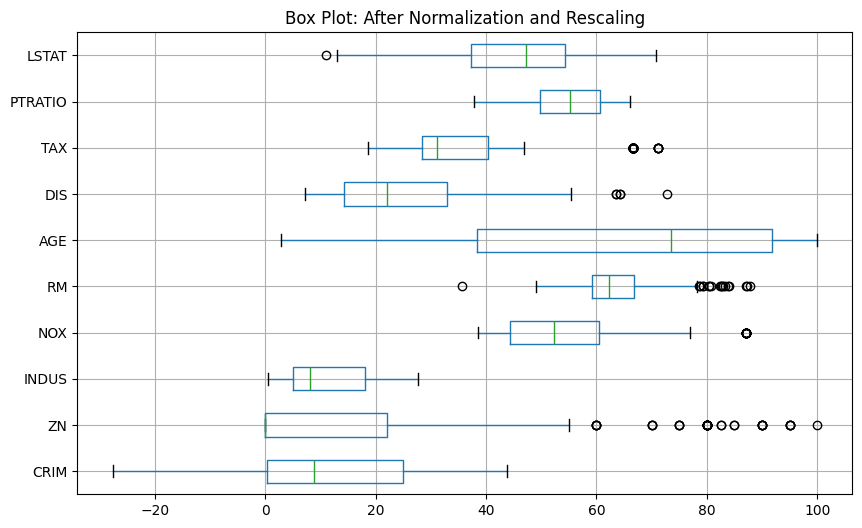

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df[features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: After Normalization and Rescaling')

In [56]:
X_point_df = pd.DataFrame.from_dict(X_point, orient='index').T

X_point_poly = poly.fit_transform(X_point_df)
X_point_poly.shape
y_pred = model.predict(X_point_poly)

print('PREDICTION:')
print(f' - House Price  : ${np.round(y_pred[0]):,} ± ${train_rmse}')

PREDICTION:
 - House Price  : $13,592.0 ± $2068.4657


## *Pandas Shortcut using method chaining - Hints at Model Deployment

There was a LOT of transformations made on the dataframe before applying it to a machine learning model. We did this as an "exploratory" analysis. There is a way to load the dataframe and perform all the transformations in one go. This makes use of a feature of pandas called **method chaining**. We need to go back and look at **all** the data processing steps performed on the dataframe  in the sequence that they were performed:

 - df["NOX"] = df["NOX"]*100
 - df["RM"] = df["RM"]*10
 - df["TAX"] = df["TAX"]/10
 - df = df[df["CRIM"] <= 20]
 - df = df[df["CRIM"] <= 8]
 - df["CRIM"] = df["CRIM"]*10
 - df["PTRATIO"] = df["PTRATIO"]*3
 - df["DIS"] = df["DIS"]*6
 - df.loc[:, "CRIM"] = np.log(df["CRIM"])
 - df.loc[:, "LSTAT"] = np.log(df["LSTAT"])
 - df["CRIM"] = df["CRIM"]*10
 - df["LSTAT"] = df["LSTAT"]*20

In [50]:
df2 = (pd.read_excel('HousingData.xlsx')
       .query("CRIM <= 8")       
       .assign(NOX     = lambda df_: df_["NOX"] * 100,
               RM      = lambda df_: df_["RM"] * 10,
               TAX     = lambda df_: df_["TAX"] / 10,
               PTRATIO = lambda df_: df_["PTRATIO"] * 3,
               DIS     = lambda df_: df_["DIS"] * 6,               
               CRIM    = lambda d: 10*np.log(10*d["CRIM"]),
               LSTAT   = lambda d: 10*np.log(d["LSTAT"])
             )
      )

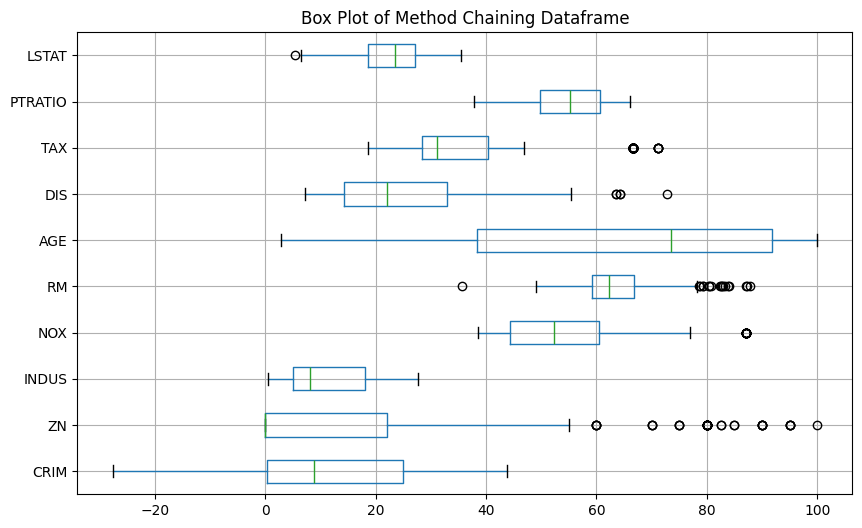

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df2[features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot of Method Chaining Dataframe')